# Import the necessary packages for images, files, JSONs, and CSVs

In [1]:
#Image reading, writing, and plotting
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io
from skimage import img_as_ubyte

#numpy
import numpy as np

#File management
import os

#JSON and CSV files
import json
import pandas as pd
import csv

#import hemagso's data cleaner
from utility.preprocessing import center_and_resize


%matplotlib inline

# Select which folders to convert (or all of them)

In [7]:
sprites_folder = os.path.join(os.getcwd(),"sprites")
data_folder = os.path.join(os.getcwd(), "data")

all_gen_folders = sorted([f for f in os.listdir(sprites_folder) if not f.startswith(".")])


# !! ALTERNATIVE !!: replace all_gens_folders with specific folders
# Comment out the below line to automatically convert every folder in sprites
all_gen_folders = ["rby"]

print("folders to convert :: ",all_gen_folders)

folders to convert ::  ['bw', 'dpp', 'gsc', 'rby', 'xydex']


# Load Pokedex (JSON file)

In [5]:
with open("pokedex.json") as xyz:
    pokedex = json.load(xyz)

# Convert the files and create a Master List CSV file (for creating train/test sets)

- CSV file named: "aa_masterlist.csv"
- Uses hemagso's conversion code (github located here: https://github.com/hemagso/neuralmon/blob/master/utility/preprocessing.py)
- !!Warning!!: If a sprite is smaller than the Bounding Box (64x64), then the images won't be converted :(

sprites_gen_folder ::  /home/tariq/PokemonTypeNN/sprites/xydex


/home/tariq/anaconda3/envs/pokemon/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Completed generating images from folder::  xydex


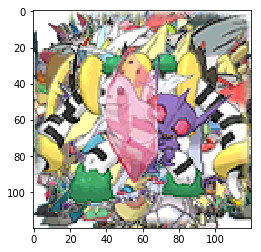

In [6]:
#
# Initial column names (and their corresponding initial values) for the CSV file
#
row_keys = ["pokemon","dex_number","normal","fighting","flying","poison","ground",
        "rock","bug","ghost","steel","fire",
        "water","grass","electric","psychic","ice","dragon","dark","fairy"]
row_vals = [""]+[0]*(len(row_keys)-1)


for gen_folder in all_gen_folders:
    sprites_gen_folder = os.path.join(sprites_folder, gen_folder)
    data_gen_folder    = os.path.join(data_folder,    gen_folder)
    print("sprites_gen_folder :: ", sprites_gen_folder)
    
    #
    #If the folder (e.g. bw) does not exist in data, create it!
    #
    if(not os.path.exists(data_gen_folder)):
        try:
            os.mkdir(data_gen_folder)
        except OSError:
            print("Creation of the directory %s in <data> failed" %data_gen_folder)
        else:
            print("Successfully created the directory %s in <data> "%data_gen_folder)
    #
    #ensure that only png files are being added
    #
    pkm_img_list = [pkm for pkm in os.listdir(sprites_gen_folder) if pkm.endswith(".png")]
    #print(pkm_img_list)
    
    #
    # Create csv list (has rows of Pokemon, num, and [types]). Each row is a dictionary.
    #
    csv_list = []
    
    for pkm_img_string in pkm_img_list:
        sprites_pkm_loc = os.path.join(sprites_gen_folder,pkm_img_string)
        data_pkm_loc = os.path.join(data_gen_folder, pkm_img_string)
        
        pkm_string = pkm_img_string[0:pkm_img_string.index(".png")]
#         print("is ", pkm_string, " in the pokedex? ", pkm_string in pokedex)
#         print("does the pokemon have a type? ", "types" in pokedex[pkm_string])
#         print("does the pokemon have a number? ", "num" in pokedex[pkm_string])
#         print(pokedex[pkm_string]["types"])
        
        if pkm_string in pokedex:
            if "types" in pokedex[pkm_string] and "num" in pokedex[pkm_string]:
                #checks to ensure that the sprite isn't a fanmade pokemon
                if pokedex[pkm_string]["num"] > 0:
                    #
                    # Normalize the pokemon image and then save it!
                    #
                    
                    #Load the Pokemon image and then normalize it
                    old_pkm_image = mpimg.imread(sprites_pkm_loc)
                    pkm_image = center_and_resize(old_pkm_image)

                    #Save the Pokemon image
                    # (note): img_as_ubyte normalizes the image to suppress an skimage warning
                    io.imsave(data_pkm_loc, img_as_ubyte(pkm_image))

                    
                    
                    
                    #
                    # Create a new row entry for the csv list
                    #

                    #Create a dictionary for the row
                    row_dict = dict(zip(row_keys, row_vals))

                    row_dict["pokemon"] = pkm_img_string
                    row_dict["dex_number"] = pokedex[pkm_string]["num"]

                    #Goes through the types (from the pokedex) and sets the corresponding column val in 
                    #the row to 1 (e.g. the fire type column is set to 1 for Magby)
                    for pkm_type in (t.lower() for t in pokedex[pkm_string]["types"]):
                            row_dict[pkm_type] = 1

                    #Append the row to the csv_list
                    csv_list.append(row_dict)

    #
    # Create pandas frame to write into csv file
    #
    df = pd.DataFrame(csv_list,columns=row_keys)
    df.sort_values("dex_number", inplace=True, ascending=True)
    #print(df)
    writeable_df = df.to_csv(os.path.join(data_gen_folder,"aa_masterlist.csv"),encoding="utf-8",index=False)
    print("Completed generating images from folder:: ", gen_folder)

In [74]:
#TEST_CODE




pkm_list = list(pokedex.keys())[0:10]

row_list = []

keys = ["pokemon","dex_number","normal","fighting","flying","poison","ground","rock","bug","ghost","steel","fire",
    "water","grass","electric","psychic","ice","dragon","dark","fairy"]
corr_num = [""]+[0]*(len(keys)-1)

for pkm in pkm_list:

    row_dict = dict(zip(keys, corr_num))

    row_dict["pokemon"] = pkm
    row_dict["dex_number"] = pokedex[pkm]["num"]
    
    for t in (t.lower() for t in pokedex[pkm]["types"]):
            row_dict[t] = 1
    
    row_list.append(row_dict)
    
df = pd.DataFrame(row_list,columns=keys)
print(df)
writeable_df = df.to_csv("testdf.csv",encoding="utf-8",index=False)
print(writeable_df)


          pokemon  dex_number  normal  fighting  flying  poison  ground  rock  \
0       bulbasaur           1       0         0       0       1       0     0   
1         ivysaur           2       0         0       0       1       0     0   
2        venusaur           3       0         0       0       1       0     0   
3    venusaurmega           3       0         0       0       1       0     0   
4      charmander           4       0         0       0       0       0     0   
5      charmeleon           5       0         0       0       0       0     0   
6       charizard           6       0         0       1       0       0     0   
7  charizardmegax           6       0         0       0       0       0     0   
8  charizardmegay           6       0         0       1       0       0     0   
9        squirtle           7       0         0       0       0       0     0   

   bug  ghost  steel  fire  water  grass  electric  psychic  ice  dragon  \
0    0      0      0     0      

In [68]:
#TEST CODE

print(pokedex["magby"]["types"])
types = ["normal","fighting","flying","poison","ground","rock","bug","ghost","steel","fire",
        "water","grass","electric","psychic","ice","dragon","dark","fairy"]
corr_num = range(2,len(types)+2)
print(len(types))
print(len(corr_num))

pkm_types_dict = {}
for i in range(0,len(types)):
    pkm_types_dict[types[i]] = corr_num[i]

print(pkm_types_dict)

df = pd.DataFrame(columns=["Pokemon","DexNum"]+types)

print(df)

['Fire']
18
18
{'normal': 2, 'fighting': 3, 'flying': 4, 'poison': 5, 'ground': 6, 'rock': 7, 'bug': 8, 'ghost': 9, 'steel': 10, 'fire': 11, 'water': 12, 'grass': 13, 'electric': 14, 'psychic': 15, 'ice': 16, 'dragon': 17, 'dark': 18, 'fairy': 19}
Empty DataFrame
Columns: [Pokemon, DexNum, normal, fighting, flying, poison, ground, rock, bug, ghost, steel, fire, water, grass, electric, psychic, ice, dragon, dark, fairy]
Index: []


/home/tariq/PokemonTypeNN/sprites/bw/mandibuzz.png


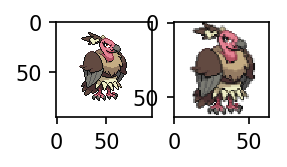

In [12]:
#TEST

main_folder = os.getcwd()
full_test_path = os.path.join(main_folder,"sprites","bw","mandibuzz.png")
print(full_test_path)
test_img = mpimg.imread(full_test_path)

rows = 14
cols = 14

plt.figure(figsize=(rows,cols),dpi=150)
plt.subplot(rows,cols,1)
plt.imshow(test_img)

resize_test_img = center_and_resize(test_img)
plt.subplot(rows,cols,2)
plt.imshow(resize_test_img)

plt.show()

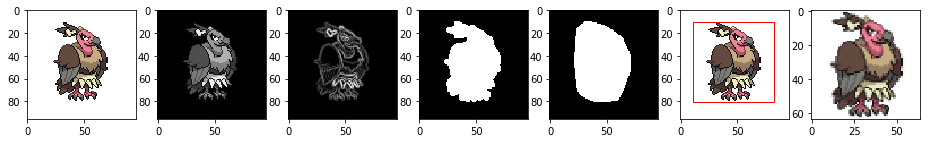

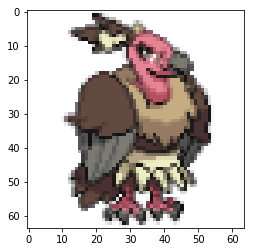

In [13]:
#TEST

resize_test_img = center_and_resize(test_img, plot=True)
plt.imshow(resize_test_img)